PHASE ONE:

TOPIC: HOUSE PRICES PREDICTION

Stage One: Problem Definition


Background:
The real estate market is a significant sector of the global economy, and for many individuals and families, buying a house is one of the most important financial decisions they will make. The housing market is influenced by a myriad of factors, including location, size, features, and economic conditions. Accurately predicting house prices is not only essential for buyers and sellers but also for real estate agents, investors, and financial institutions. In recent years, the application of data science and machine learning has revolutionized the way we approach this problem, making it possible to develop highly accurate predictive models.

Problem Statement:
The problem at hand is to build a machine learning model that can accurately predict house prices based on various features and attributes. These features might include the number of bedrooms, square footage, location, amenities, and more. The objective is to create a predictive model that can help homeowners, buyers, and real estate professionals determine the estimated value of a property. The challenge lies in processing and analyzing a diverse set of data points and building a model that generalizes well to make accurate predictions for different types of houses in various locations.

Project Objective:
The primary objective of this project is to develop a robust and accurate machine learning model for predicting house prices.

Stage Two: Project Idea Validation

The project idea was validated by my instructor.

Stage Three: Data Gathering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [19]:
data = pd.read_csv('train.csv')
data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [4]:
dx = data.copy()
dx.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


Exploratory Data Analysis

In [18]:
dx.columns.values


array(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'state',
       'product_type', 'sub_area', 'area_m', 'raion_popul',
       'green_zone_part', 'indust_part', 'children_preschool',
       'preschool_quota', 'preschool_education_centers_raion',
       'children_school', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25', 'culture_objects_top_25_raion',
       'shopping_centers_raion', 'office_raion',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion',
       'railroad_terminal_raion', 'big_market_raion',
       'nuclear_reactor_raion', 'detention_facility_raion', 'full_all',
       'male_f', 'female_f', 'young_all', 'young_male',

In [8]:
data.shape

(30471, 292)

In [9]:
data.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [10]:
data.isnull().sum()

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [13]:
data.duplicated().any()

False

<h4>Analytical Questions:</h4>

It is essential to perform a thourough analysis of the dataset, to gain insights that can help build house prices prediction model, and the following questions will help to explore various aspects of the dataset.

- What is the distribution of house prices in the dataset?
- How does the average price vary across different categories in a categorical column?
- How many unique values are there in categorical columns like 'material'?
- What percentage of missing values are there in each column?

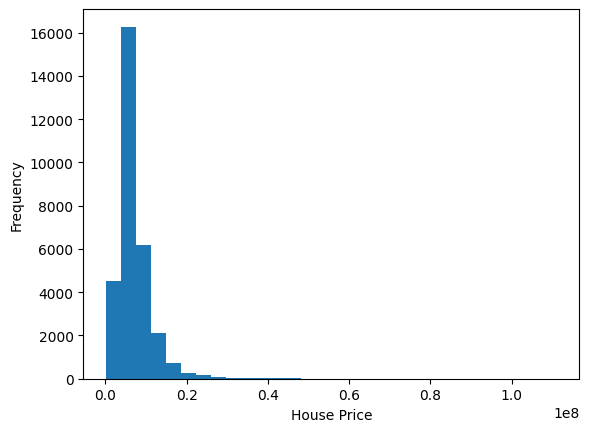

In [21]:
# What is the distribution of house prices in the dataset?

import matplotlib.pyplot as plt
plt.hist(dx['price_doc'], bins=30)
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()

In [34]:
# How does the average price vary across different categories in a categorical column?

avg_price_by_material = dx.groupby('material')['price_doc'].mean()
avg_price_by_material 



material
1.0    7.088091e+06
2.0    8.421237e+06
3.0    6.931143e+06
4.0    1.018341e+07
5.0    6.483122e+06
6.0    7.979828e+06
Name: price_doc, dtype: float64

In [38]:
# How many unique values are there in categorical columns like 'material'?

unique_materials = dx['material'].nunique()
unique_materials

6

In [45]:
# What percentage of missing values are there in each column?

missing_percentage = dx.isnull().mean() * 100
missing_percentage

id                     0.000000
full_sq                0.000000
life_sq               20.947786
floor                  0.548062
max_floor             31.413475
                        ...    
leisure_count_5000     0.000000
sport_count_5000       0.000000
market_count_5000      0.000000
price_doc              0.000000
age_of_building       44.649011
Length: 292, dtype: float64

<h3>PHASE TWO: Data Visualisation And Model Selection</h3>

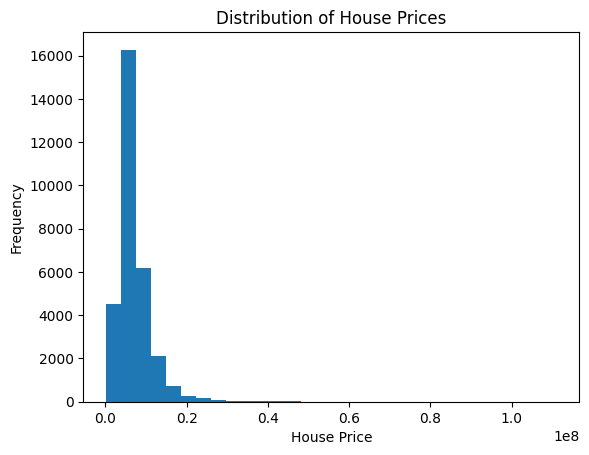

In [53]:
# distribution of house prices

plt.hist(dx['price_doc'], bins=30)
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


In [ ]:
# trend in the number of houses sold over time
dx['timestamp'] = pd.to_datetime(dx['timestamp'])
dx.set_index('timestamp', inplace=True)
monthly_house_count = dx.resample('M').size()
plt.plot(monthly_house_count.index, monthly_house_count.values)
plt.xlabel('Date')
plt.ylabel('Number of Houses Sold')
plt.title('Trend in Number of Houses Sold Over Time')
plt.show()


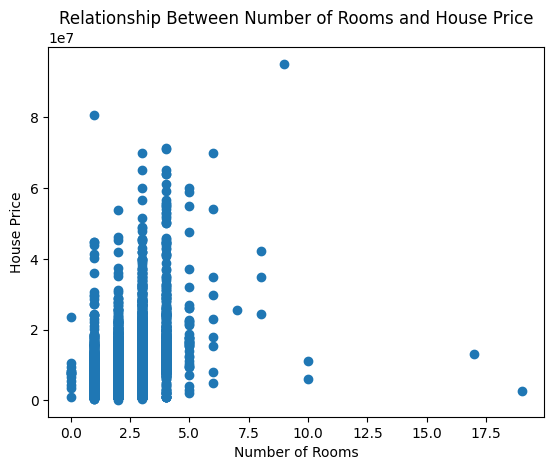

In [51]:
# relationship between the number of rooms and the house price
plt.scatter(dx['num_room'], dx['price_doc'])
plt.xlabel('Number of Rooms')
plt.ylabel('House Price')
plt.title('Relationship Between Number of Rooms and House Price')
plt.show()


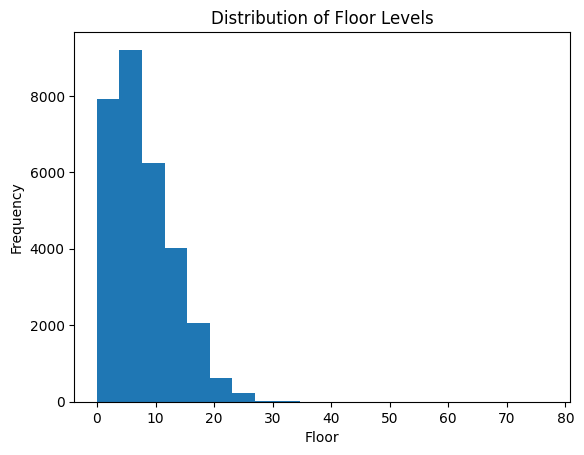

In [54]:
# distribution of the 'floor' variable
plt.hist(dx['floor'], bins=20)
plt.xlabel('Floor')
plt.ylabel('Frequency')
plt.title('Distribution of Floor Levels')
plt.show()

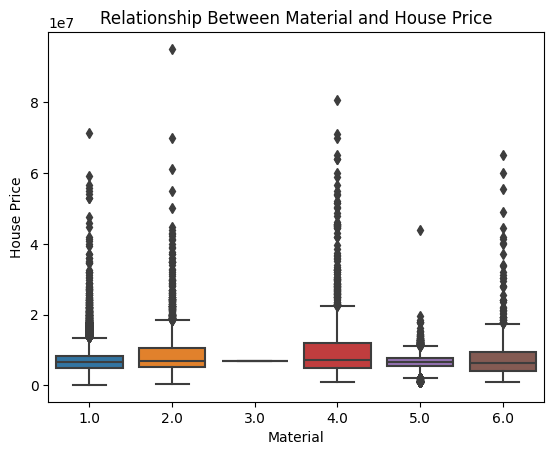

In [56]:
# the type of material used in construction in relation to house prices
import seaborn as sns
sns.boxplot(x='material', y='price_doc', data=dx)
plt.xlabel('Material')
plt.ylabel('House Price')
plt.title('Relationship Between Material and House Price')
plt.show()


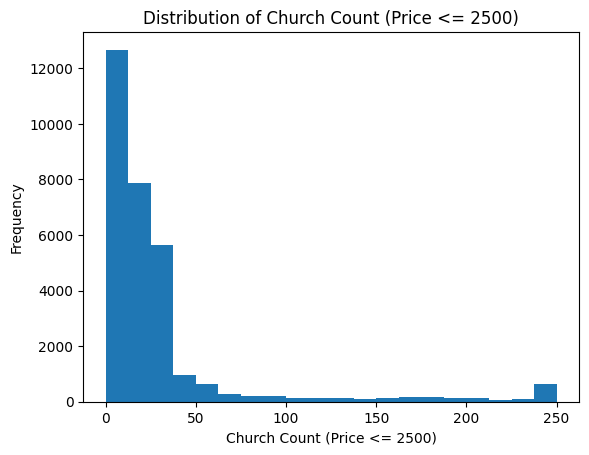

In [59]:
# distribution of 'church_count_50000'
plt.hist(dx['church_count_5000'], bins=20)
plt.xlabel('Church Count (Price <= 2500)')
plt.ylabel('Frequency')
plt.title('Distribution of Church Count (Price <= 2500)')
plt.show()
